In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

Using TensorFlow backend.


In [2]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
Xtrain = Xtrain.reshape(60000, 784)
ytrain = np_utils.to_categorical(ytrain)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.reshape(10000, 784)
Xtest = Xtest.astype('float32')

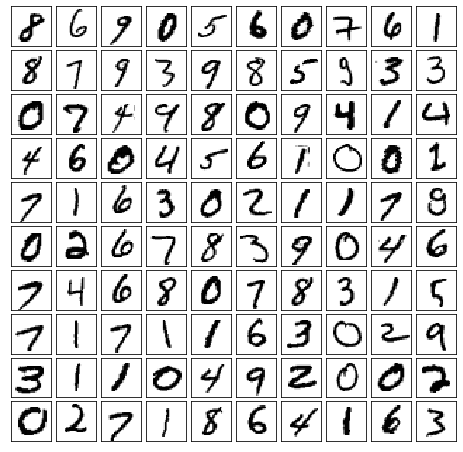

In [3]:
#plot some of the Xtrain data
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    j = i+31
    #print handwrittent digits. 
    ax.imshow(Xtrain[j].reshape(28, 28), cmap='binary', interpolation='nearest')

In [4]:
#normalize the digits
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

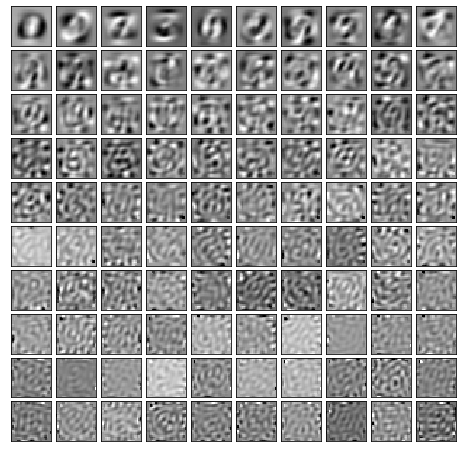

In [5]:
#reduce rank to 100
pca = PCA(n_components = 100)
pca.fit_transform(Xtrain)

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    j = i
    #print handwrittent digits. 
    ax.imshow(pca.components_[j].reshape(28, 28), cmap='binary', interpolation='nearest')

Text(0, 0.5, 'Cumulative variance')

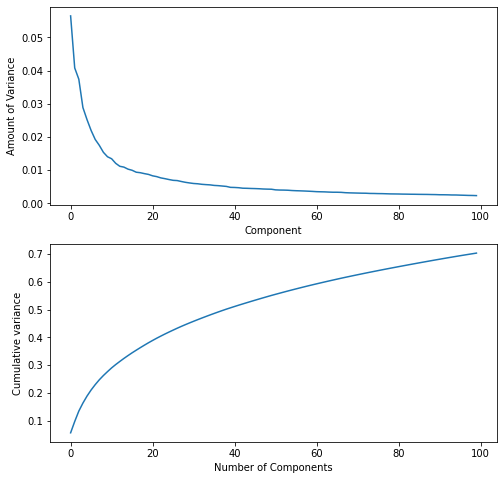

In [6]:
#plot the rank reduced images above
fig, axarr = plt.subplots(2, figsize=(8,8))

axarr[0].plot(pca.explained_variance_ratio_)
axarr[0].set_xlabel('Component')
axarr[0].set_ylabel('Amount of Variance')

axarr[1].plot(np.cumsum(pca.explained_variance_ratio_))
axarr[1].set_xlabel('Number of Components')
axarr[1].set_ylabel('Cumulative variance')

In [7]:
def runPca(components): 
    pca = PCA(n_components=components)
    X_pca_train = pca.fit_transform(Xtrain)
    X_pca_test = pca.transform(Xtest)
#     inv_pca = pca.inverse_transform(X_pca_train)
#     inv_sc = scaler.inverse_transform(inv_pca)
    
    return (X_pca_train, X_pca_test)

In [8]:
#reduced rank training set for visualization
components = 100
X_pca_train, X_pca_test = runPca(components)
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

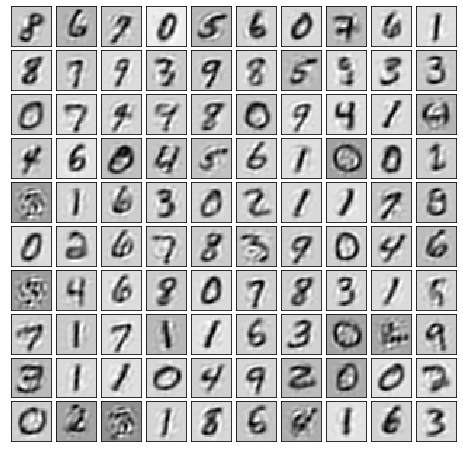

In [9]:
#plot some of the Xtrain data with 100 components
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    j = i+31
    #print handwrittent digits. 
    ax.imshow(inv_sc[j].reshape(28, 28), cmap='binary', interpolation='nearest')

In [10]:
#train with PCA


components = 25
X_pca_train, X_pca_test = runPca(components)
regr = MLPClassifier(solver = 'adam', learning_rate = 'adaptive', alpha = 10**-1,
                     hidden_layer_sizes = (100,), activation = 'relu', 
                     verbose = False, max_iter = 30, early_stopping = True, random_state=None).fit(X_pca_train, ytrain)

ymodel = regr.predict(X_pca_test) 
accuracy_score(ytest, np.argmax(ymodel, axis=1))

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9398

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


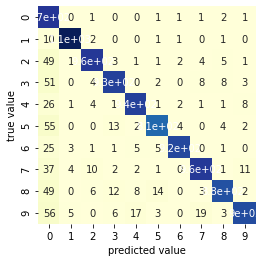

In [11]:
print(ytest)
print(np.argmax(ymodel == 1, axis = 1))
mat = confusion_matrix(ytest, np.argmax(ymodel == 1, axis = 1))

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='YlGnBu') #flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');

In [12]:
#train with PCA
components = 50
X_pca_train, X_pca_test = runPca(components)
regr = MLPClassifier(solver = 'adam', learning_rate = 'adaptive', alpha = 10**-1,
                     hidden_layer_sizes = (100,), activation = 'relu', 
                     verbose = False, max_iter = 30, early_stopping = True, random_state=None).fit(X_pca_train, ytrain)

ymodel = regr.predict(X_pca_test) 
accuracy_score(ytest, np.argmax(ymodel, axis=1))

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9543

In [13]:
import time 

In [14]:
#train with PCA
components = 100
X_pca_train, X_pca_test = runPca(components)

start = time.time()
regr = MLPClassifier(solver = 'adam', learning_rate = 'adaptive', alpha = 10**-1,
                     hidden_layer_sizes = (100,), activation = 'relu', 
                     verbose = False, max_iter = 30, early_stopping = True, random_state=None).fit(X_pca_train, ytrain)
end = time.time()
print('time: ',end-start)
ymodel = regr.predict(X_pca_test) 
accuracy_score(ytest, np.argmax(ymodel, axis=1))

time:  17.743739366531372


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9595

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


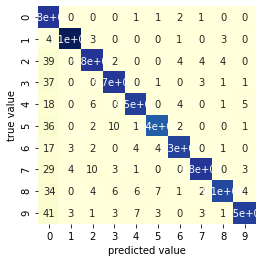

In [15]:
print(ytest)
print(np.argmax(ymodel == 1, axis = 1))
mat = confusion_matrix(ytest, np.argmax(ymodel == 1, axis = 1))

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='YlGnBu') #flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');

In [16]:
#train without PCA
start = time.time()
regr = MLPClassifier(solver = 'adam', learning_rate = 'adaptive', alpha = 10**-1,
                     hidden_layer_sizes = (100,), activation = 'relu', 
                     verbose = False, max_iter = 30, early_stopping = True, random_state=None).fit(Xtrain, ytrain)
end = time.time()
print('time: ', end-start)
ymodel = regr.predict(Xtest) 
print(accuracy_score(ytest, np.argmax(ymodel, axis=1)))    


time:  60.38344693183899
0.9619


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


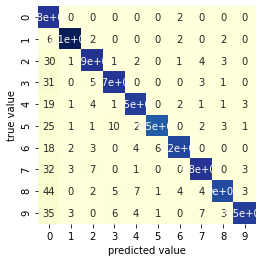

In [17]:
print(ytest)
print(np.argmax(ymodel == 1, axis = 1))
mat = confusion_matrix(ytest, np.argmax(ymodel == 1, axis = 1))

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='YlGnBu') #flag, YlGnBu, jet
plt.xlabel('predicted value')
plt.ylabel('true value');

In [18]:
def compAcc(input):
  #train with PCA
  components = input
  X_pca_train, X_pca_test = runPca(components)
  regr = MLPClassifier(solver = 'adam', learning_rate = 'adaptive', alpha = 10**-1,
                      hidden_layer_sizes = (100,), activation = 'relu', 
                      verbose = False, max_iter = 50, early_stopping = True, random_state=None).fit(X_pca_train, ytrain)

  ymodel = regr.predict(X_pca_test) 
  return accuracy_score(ytest, np.argmax(ymodel, axis=1))

compList = [i**2 for i in range(1, 29)]
accList = [compAcc(compList[i]) for i in range(len(compList))]
print(accList)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

[0.187, 0.584, 0.8596, 0.9261, 0.9429, 0.9535, 0.9566, 0.9573, 0.9609, 0.9608, 0.9594, 0.9606, 0.963, 0.9631, 0.9625, 0.9636, 0.9636, 0.9644, 0.9625, 0.9619, 0.9624, 0.9596, 0.9632, 0.9598, 0.9601, 0.9588, 0.9629, 0.9605]


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


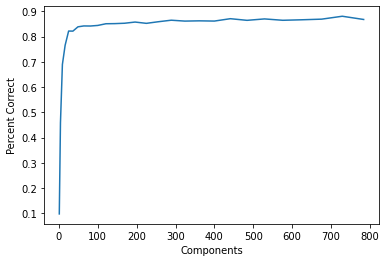

In [17]:
plt.xlabel("Components")
plt.ylabel("Percent Correct")
plt.plot(compList, accList)